# ML model: Predicting Hiring Outcomes and Salary Expectations

Registration no: 2322478

### Introduction

In this project we try to predict the hiring decisions and also predict the salary expectations based on the data. Traditional hiring methods often reply on subjective judgments, which can lead to inconsistent and biased decisions. To address these challenges, we have developed a supervised machine learning model which can enhance recruitment strategies.

By analyzing historical data, we have developed predictive models that can forecast hiring decisions and salary expectations with high accuracy. These models utilize various candidate attributes such as age, gender, experience, education level, skills, interview performance, strategies etc. to provide data driven insights that aid in making informed hiring choices.

##### The primary objectives of this project are twofold:
1. Predict Hiring Decisions: Determine whether a candidate is likely to be hired based on their profile and application data.

2. Estimate Salary Expectations: Predict the potential salary a candidate may receive if the candidate is hired.

This model offers valuable insights to candidates, helping them better prepare for the recruitment process by understanding the factors that influence hiring decisions and having a realistic expectation of their potential salary. Additionally, knowing the expected salary range allows candidates to negotiate more effectively and set realistic career goals. This data-driven approach empowers candidates to strategically plan their professional development and approach the job market with confidence.

### About dataset

The project contains two datasets:
1. Recruitment_data: This dataset provides insights into factors influencing hiring decisions. Each record represents a candidate with various attributes considered during the hiring process. The goal is to predict whether a candidate will be hired based on these attributes.

The variables description are as follows:

Age -
Description: Age of the candidate.
Data Range: 20 to 50 years.
Data Type: Integer.

Gender -
Description: Gender of the candidate.
Categories: Male (0) or Female (1).
Data Type: Binary.

Education Level -
Description: Highest level of education attained by the candidate.
Categories:
1: Bachelor's (Type 1)
2: Bachelor's (Type 2)
3: Master's
4: PhD
Data Type: Categorical.

Experience Years -
Description: Number of years of professional experience.
Data Range: 0 to 15 years.
Data Type: Integer.

Previous Companies Worked -
Description: Number of previous companies where the candidate has worked.
Data Range: 1 to 5 companies.
Data Type: Integer.

Distance From Company -
Description: Distance in kilometers from the candidate's residence to the hiring company.
Data Range: 1 to 50 kilometers.
Data Type: Float (continuous).

Interview Score -
Description: Score achieved by the candidate in the interview process.
Data Range: 0 to 100.
Data Type: Integer.

Skill Score -
Description: Assessment score of the candidate's technical skills.
Data Range: 0 to 100.
Data Type: Integer.

Personality Score -
Description: Evaluation score of the candidate's personality traits.
Data Range: 0 to 100.
Data Type: Integer.

Recruitment Strategy -
Description: Strategy adopted by the hiring team for recruitment.
Categories:
1: Aggressive
2: Moderate
3: Conservative
Data Type: Categorical.

Hiring Decision (Target Variable) -
Description: Outcome of the hiring decision.
Categories:
0: Not hired
1: Hired
Data Type: Binary (Integer).

Dataset Information
Records: 1500
Features: 10
Target Variable: HiringDecision (Binary)


2. Salary Data: This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

The variables description are as follows:

Age: 
This column represents the age of each employee in years. The values in this column are numeric.

Gender: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

Education Level: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

Job Title: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

Years of Experience: This column represents the number of years of work experience of each employee. The values in this column are numeric.

Salary: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level. 

These are the description of what these two datasets are 




### Project Overview

We begin with our hiring model by importing the hiring dataset downloaded from Kaggle. We will load it into a pandas DataFrame, explore the dataset, and perform a quick Exploratory Data Analysis (EDA) to gain valuable insights and understand how different variables influence recruitment decisions.

Next, we will apply various machine learning algorithms to the dataset and select the model with the best performance based on evaluation metrics.

After finalizing the hiring model, we will move to the salary dataset which is also downloaded from Kaggle. We will load and clean the salary data, identifying correlations between dependent and independent variables. The dataset will be transformed to align with the requirements of our first model, allowing us to use the hiring model's data to predict salaries.

We will then apply different machine learning algorithms to the salary data and finalize the best-performing model based on evaluation metrics.

Finally, we will use the test dataset from the hiring model to predict the salaries of the candidates who have passed the hiring process.

### Hiring model

In [55]:
# Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
# Load the dataset in the pandas data frame named data
data = pd.read_csv('recruitment_data.csv')
data.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [57]:
# print the normal stats of the data 
data.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [58]:
# checking for the null values and the type of the dataset for better understanding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


We see that there are no null values in the dataset which is good as we have whole dataset for evaluation and don't have to deal with null values. Also we see that all the types are int or float which is good cause we can give the data to the model without any transformation. All the categorical variables are already converted to the numerical value.

##### EDA of the dataset
We'll conduct a brief Exploratory Data Analysis (EDA) to glean insights from the dataset. This includes exploring key statistics, distributions, and relationships between variables to better understand the characteristics and trends within the data.

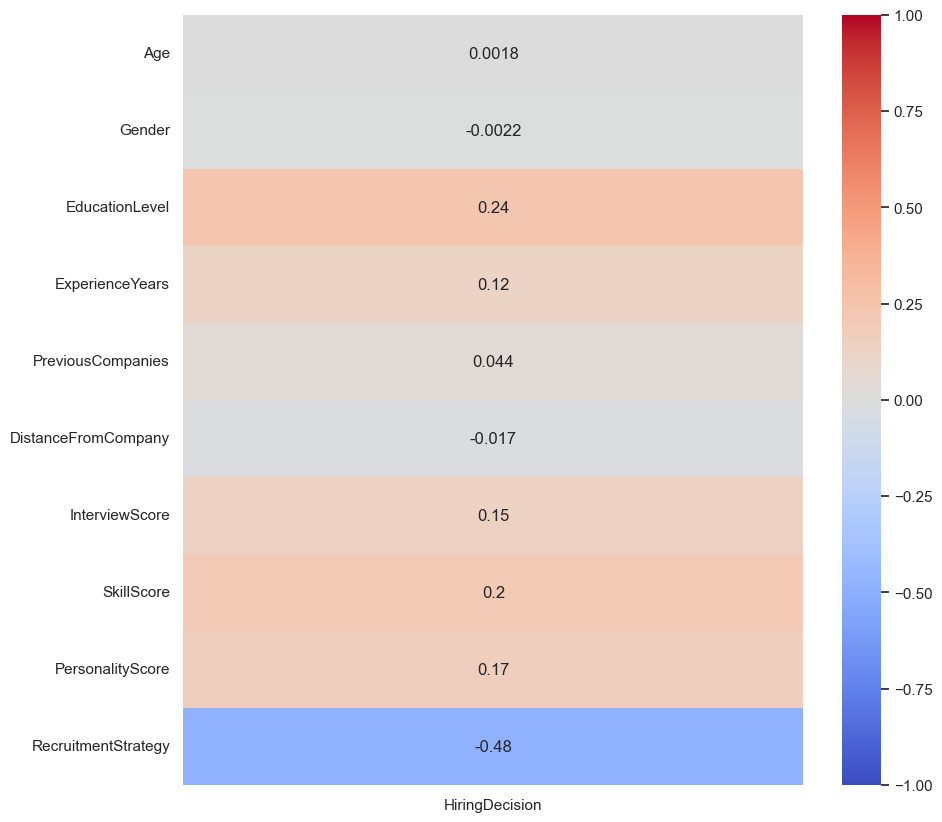

In [59]:
# find the correlation
corr = data.corr()
corr

#visually appealing data with only correlation with the hiring decision parameter
corr = data.corr()["HiringDecision"].drop("HiringDecision")
plt.figure(figsize=(10, 10))
sns.heatmap(corr.to_frame(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

The most correlated variable to the hiring decision is education level, then skill score, and then personality score which means this variables are more important in making the hiring decision. Whereas recruitment strategy is the least important in making the hiring decision.
 

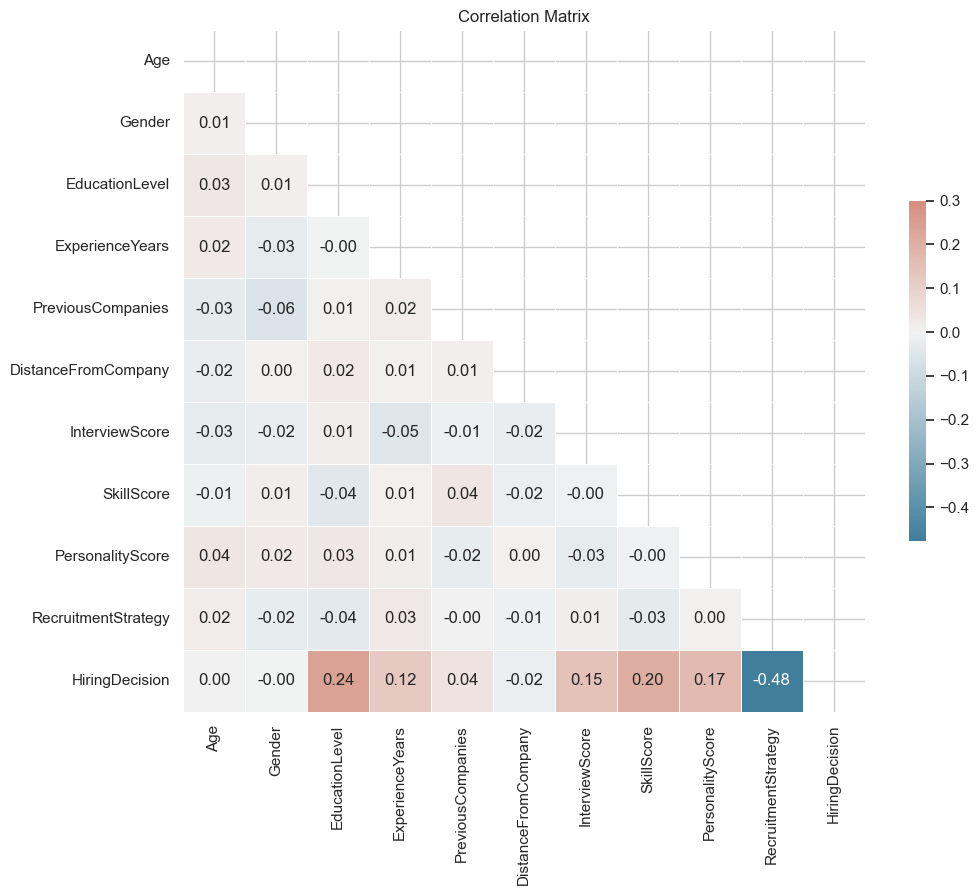

In [60]:

# Compute the correlation matrix
corr = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


##### Lets check the distribution of each independent variables

C:\Users\KUNAL SHEDGE\AppData\Local\Temp\ipykernel_31536\18689247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strategy_percentages.index, y=strategy_percentages.values, palette='pastel')


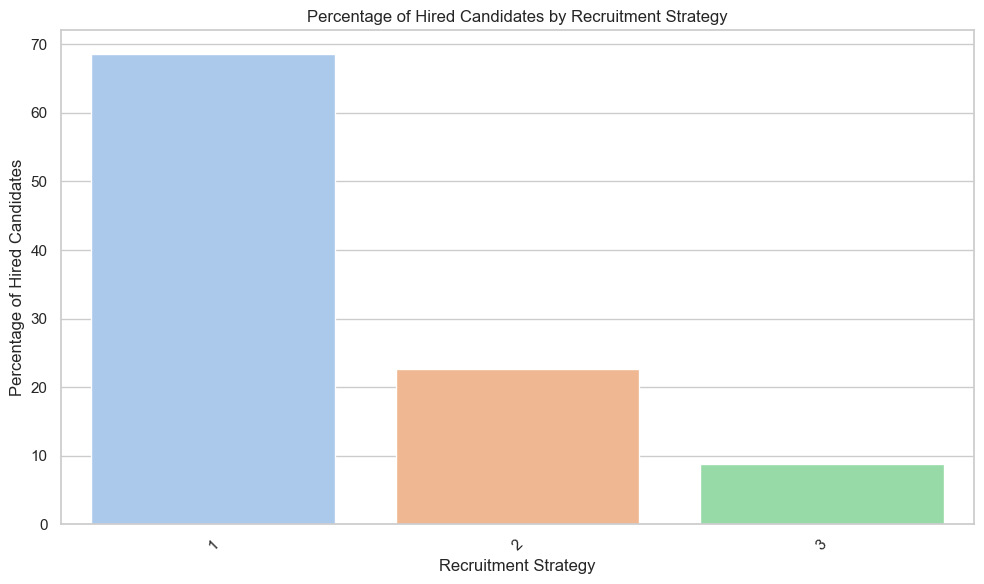

In [61]:

hired_df = data[data['HiringDecision'] == 1]

strategy_percentages = hired_df['RecruitmentStrategy'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=strategy_percentages.index, y=strategy_percentages.values, palette='pastel')
plt.xlabel('Recruitment Strategy')
plt.ylabel('Percentage of Hired Candidates')
plt.title('Percentage of Hired Candidates by Recruitment Strategy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


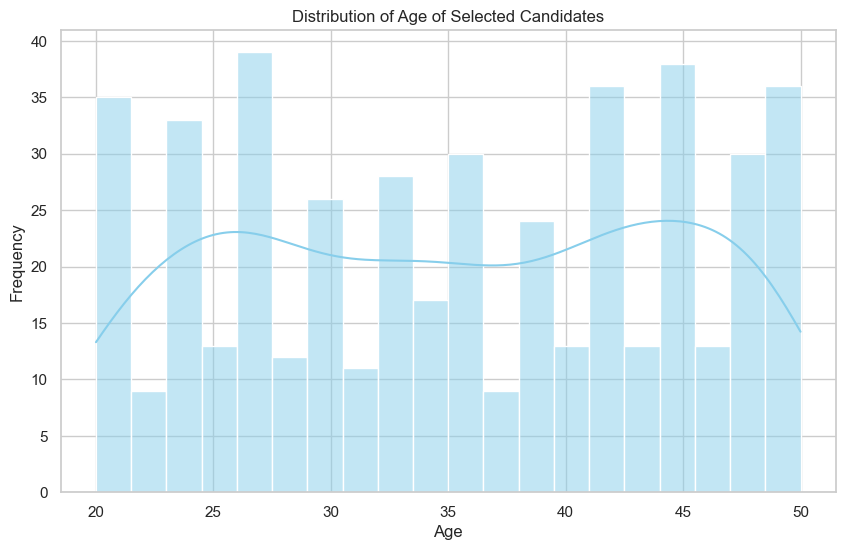

In [62]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(hired_df['Age'], bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age of Selected Candidates')

plt.show()


We see that the age of the candidates is well distributed with more pepole of age above 45 and in age group of 26-28. 

C:\Users\KUNAL SHEDGE\AppData\Local\Temp\ipykernel_31536\3381957839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hired_df, x='Gender', palette='pastel', order=hired_df['Gender'].value_counts().index)


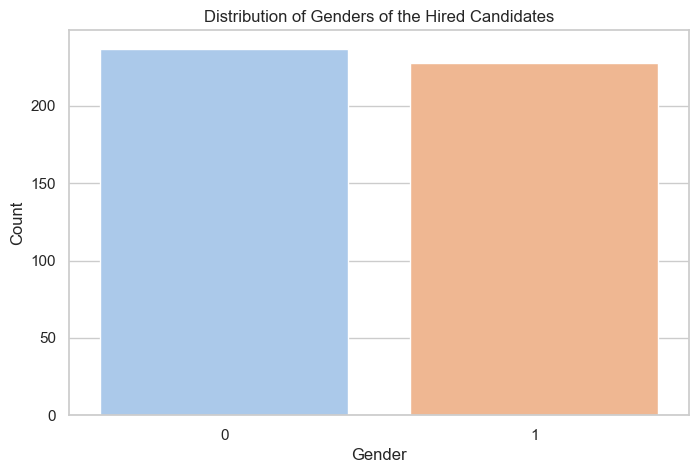

In [63]:

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=hired_df, x='Gender', palette='pastel', order=hired_df['Gender'].value_counts().index)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders of the Hired Candidates')
plt.show()


C:\Users\KUNAL SHEDGE\AppData\Local\Temp\ipykernel_31536\132833668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hired_df, x='EducationLevel', palette='viridis', order=hired_df['EducationLevel'].value_counts().index)


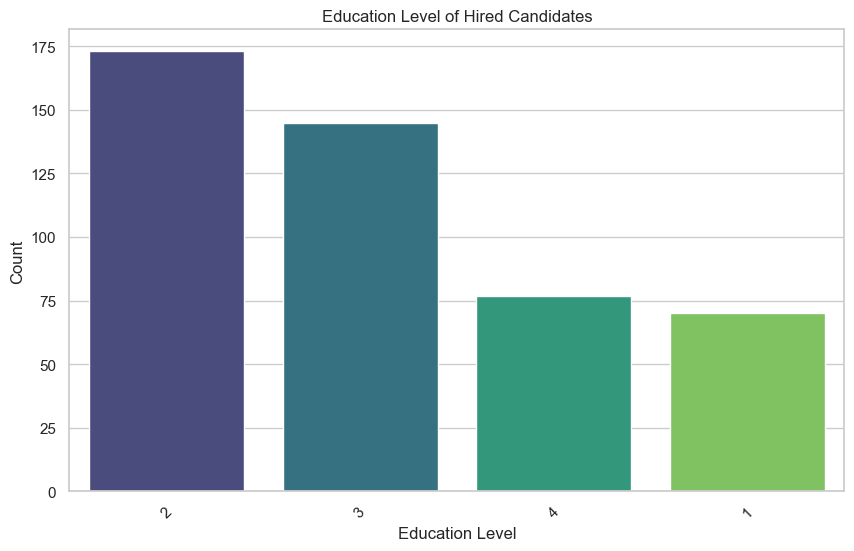

In [64]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=hired_df, x='EducationLevel', palette='viridis', order=hired_df['EducationLevel'].value_counts().index)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level of Hired Candidates')

plt.xticks(rotation=45)
plt.show()


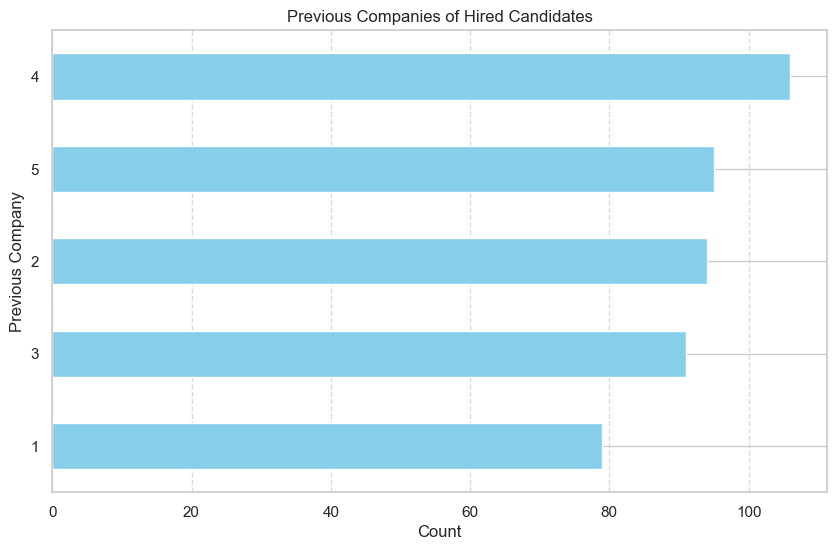

In [65]:

plt.figure(figsize=(10, 6))
hired_df['PreviousCompanies'].value_counts().sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Previous Company')
plt.title('Previous Companies of Hired Candidates')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


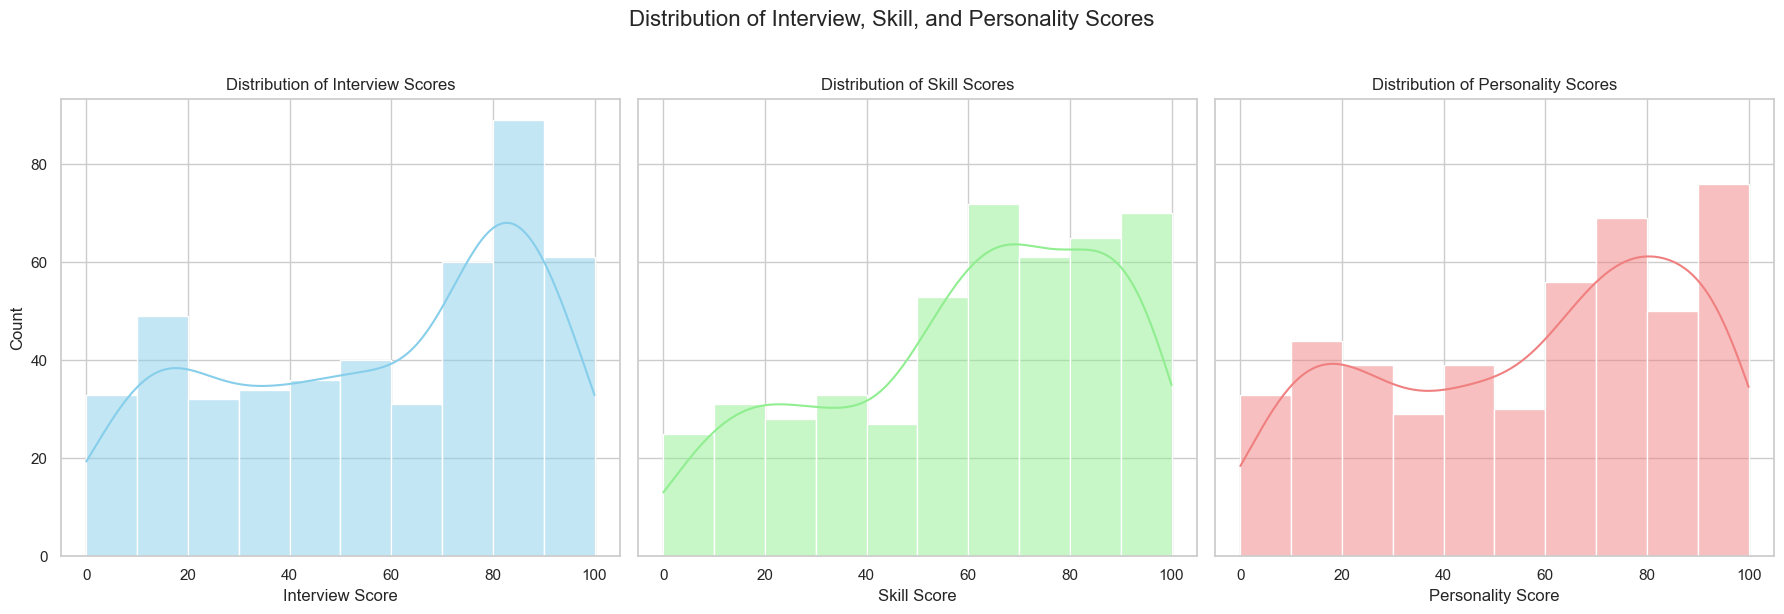

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.histplot(hired_df['InterviewScore'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Interview Score')
axes[0].set_title('Distribution of Interview Scores')

sns.histplot(hired_df['SkillScore'], kde=True, color='lightgreen', ax=axes[1])
axes[1].set_xlabel('Skill Score')
axes[1].set_title('Distribution of Skill Scores')

sns.histplot(hired_df['PersonalityScore'], kde=True, color='lightcoral', ax=axes[2])
axes[2].set_xlabel('Personality Score')
axes[2].set_title('Distribution of Personality Scores')

plt.suptitle('Distribution of Interview, Skill, and Personality Scores', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


From the above distributions of the independent variables we come to know the following insights.
The dataset consists of 1,500 candidates with various attributes impacting hiring decisions. The average candidate is around 35 years old with approximately 8 years of experience and has worked for 3 previous companies. The dataset has a balanced gender distribution which is good for evaluation as the dataset won't be biased towards one gender. Education levels range from 1 to 4, with a mean of about 2 which means that majority of the candidates have a Bachelor's degree (type 2). The interview, skill, and personality scores are roughly centered around 50. The recruitment strategy mainly employs strategies 1 and 2 which are aggressive and moderate respectively. The hiring decision variable indicates that about 31% of candidates are hired.

The distributions of Interview, Skill, and Personality Scores show bimodal patterns, with peaks around 30 and 80. Most candidates score around 80, indicating strong performance in these areas. The bimodal nature suggests two distinct groups of candidates with different levels of performance. The clustering of higher scores highlights that a significant number of candidates excel in interviews, skills, and personality traits. These insights help in identifying common performance ranges and setting effective thresholds or criteria for hiring decisions based on these scores.

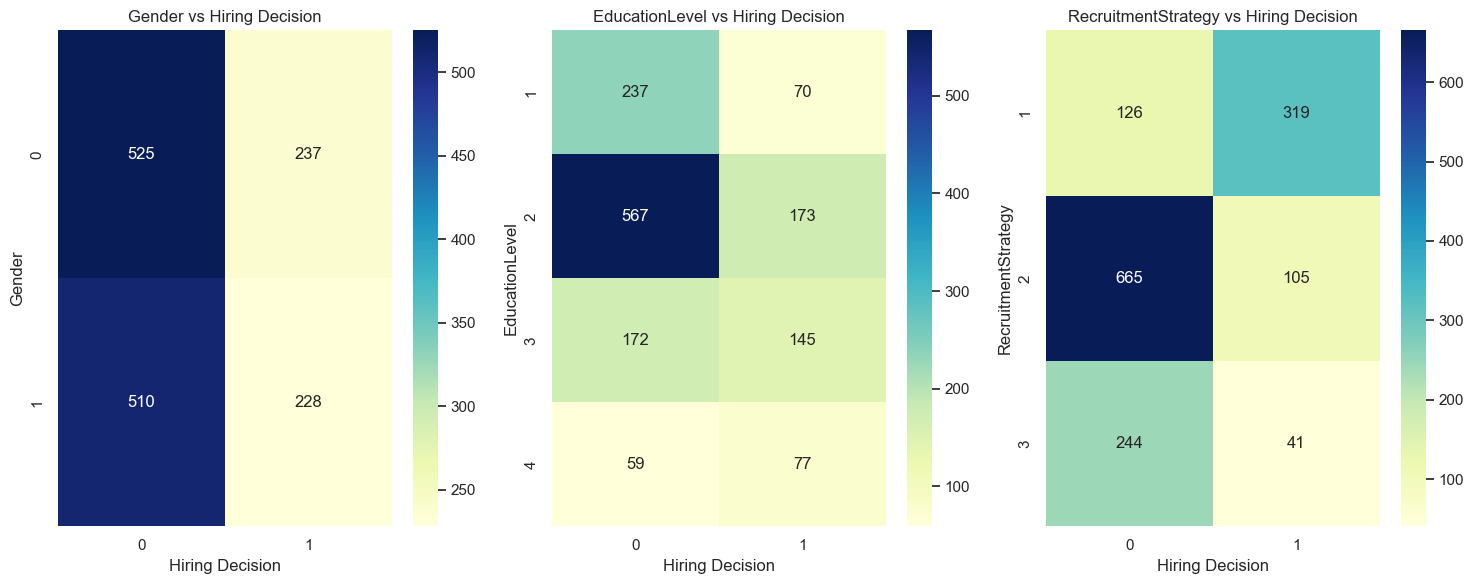

In [67]:

# Define categorical features and numeric features
cats = [i for i in data.columns if data[i].nunique() <= 4]
nums = [i for i in data.columns if i not in cats]

# Create subplots for categorical features
fig, axes = plt.subplots(ncols=len(cats)-1, figsize=(15, 6))

# Plot heatmap for each categorical feature against hiring decision
for i, j in enumerate(cats[:-1]):
    ct = pd.crosstab(data[j], data[cats[-1]])
    sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu', ax=axes[i])
    axes[i].set_title(f'{j} vs Hiring Decision')
    axes[i].set_xlabel('Hiring Decision')
    axes[i].set_ylabel(j)

plt.tight_layout()
plt.show()


##### Insights from the Heatmaps
1. **Gender**:
   - Both genders have a similar distribution in hiring decisions, indicating no significant bias.
   
2. **Education Level**:
   - Candidates with Education Level 2 have the highest hiring rates, while those with Level 1 and Level 3 also have substantial representation.
   - Higher education levels (Level 4) show a relatively higher hiring rate.

3. **Recruitment Strategy**:
   - Strategy 2 is associated with the highest number of hires, suggesting its effectiveness.
   - Strategy 1 and 3 have lower hiring rates, with Strategy 1 having a high rejection rate.

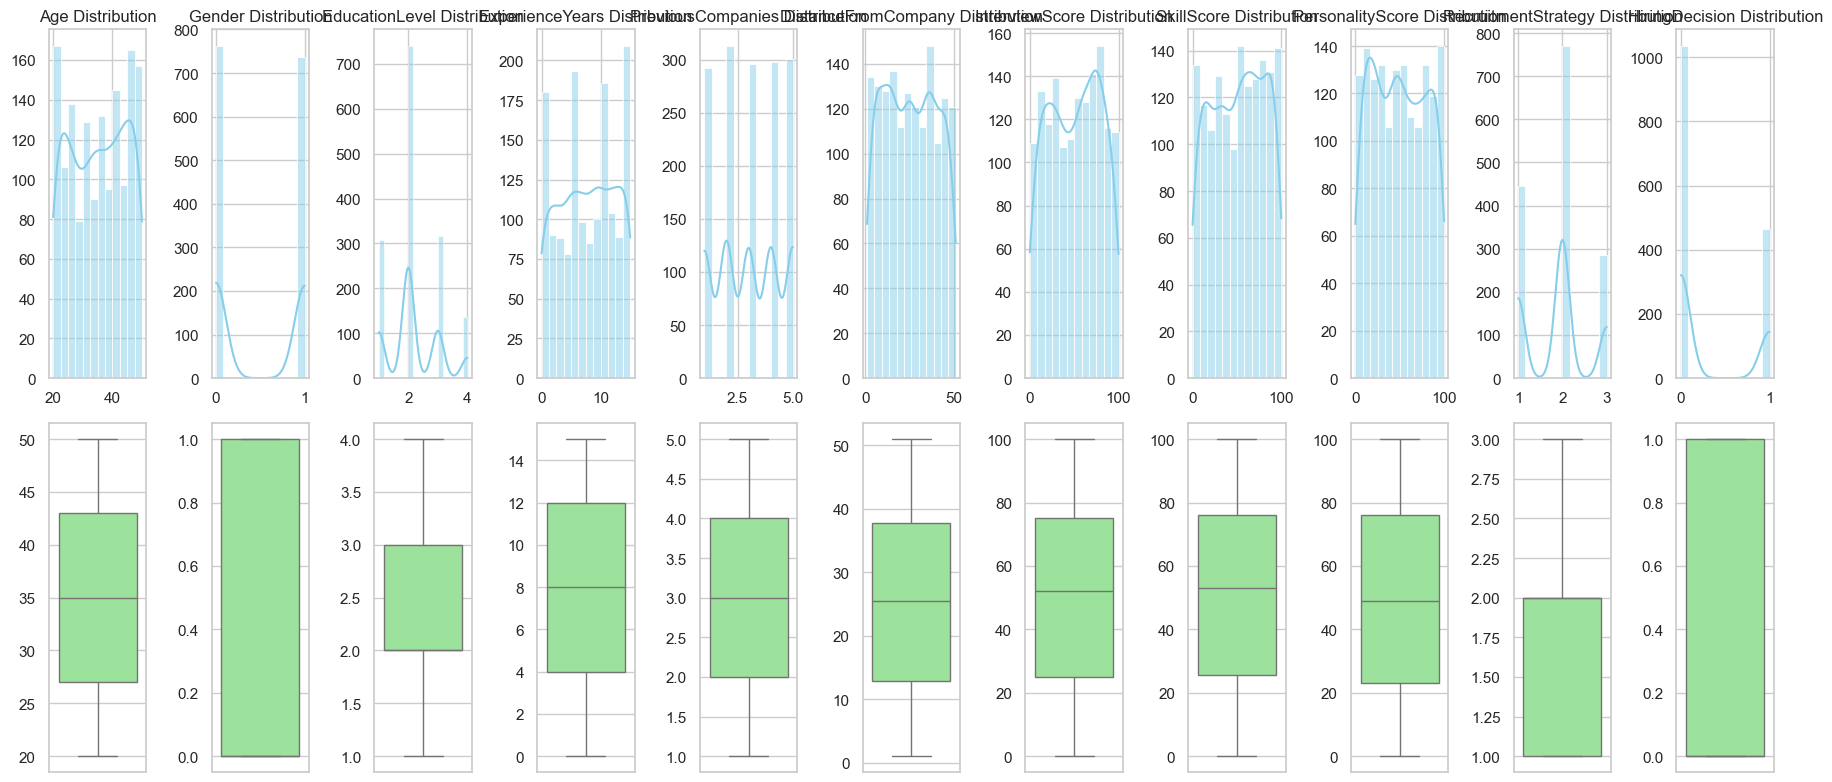

In [68]:
nums = [i for i in data.columns if data[i].dtype in ['int64', 'float64']]

# Create subplots for histograms and boxplots
fig, axes = plt.subplots(nrows=2, ncols=len(nums), figsize=(18, 8))

for i, j in enumerate(nums):
    # Plot histogram
    sns.histplot(data[j], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'{j} Distribution')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('')
    
    # Plot boxplot
    sns.boxplot(data[j], ax=axes[1, i], color='lightgreen')
    axes[1, i].set_xlabel('')
    axes[1, i].set_ylabel('')

plt.tight_layout()
plt.show()


##### Insights from the Distributions and Boxplots

1. **Age and Experience**:
   - Age and Experience show a fairly uniform distribution without significant outliers.
2. **Previous Companies and Distance**:
   - The number of previous companies and distance from the company are also evenly distributed.
3. **Interview, Skill, and Personality Scores**:
   - These scores are well-distributed, indicating a broad range of candidate assessments.
4. **Boxplots**:
   - All variables show a similar spread with no significant outliers, indicating a well-balanced dataset.

#### Now lets move to the model 

In [69]:
# divide the independent and dependent variables
# here the x will contain the independent variables 
# all the variables other than the output variable 'HiringDecision' are in x and y contains the 'HiringDecision' variable
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [70]:
# splitting the data into training and testing data
# Here we consiider 80% data as train data and 20% as test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

Applying the models

In [71]:
# importing the require libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [72]:
# Implementing the logistic regression model 
Hr_model1 = LogisticRegression()
Hr_model1.fit(x_train, y_train)
    
# Make predictions
y_pred = Hr_model1.predict(x_test)
    
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'{LogisticRegression} Accuracy: {accuracy:.4f}')
print(f'{LogisticRegression} Classification Report:\n {classification_report(y_test, y_pred)}\n')

<class 'sklearn.linear_model._logistic.LogisticRegression'> Accuracy: 0.8933
<class 'sklearn.linear_model._logistic.LogisticRegression'> Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       215
           1       0.81      0.81      0.81        85

    accuracy                           0.89       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.89      0.89      0.89       300




c:\Users\KUNAL SHEDGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression model for predicting hiring decisions achieves an accuracy of 89.33%, indicating it correctly classifies about 89 out of 100 candidates. For candidates not hired (Class 0), the model has a precision and recall of 0.93, resulting in an F1-score of 0.93. For hired candidates (Class 1), it has a precision and recall of 0.81, with an F1-score of 0.81. The overall performance, reflected by both macro and weighted averages, shows a precision, recall, and F1-score of approximately 0.93 and 0.81 respectively. This indicates the model is reliable and effective for making hiring decisions.

In [73]:
# implementing the support vector machine algorithm for the prediction
Hr_model2 = SVC()
Hr_model2.fit(x_train, y_train)
    
# Make predictions
y_pred = Hr_model2.predict(x_test)
    
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'{SVC} Accuracy: {accuracy:.4f}')
print(f'{SVC} Classification Report:\n {classification_report(y_test, y_pred)}\n')

<class 'sklearn.svm._classes.SVC'> Accuracy: 0.7233
<class 'sklearn.svm._classes.SVC'> Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       215
           1       0.56      0.12      0.19        85

    accuracy                           0.72       300
   macro avg       0.64      0.54      0.51       300
weighted avg       0.68      0.72      0.65       300




The Support Vector Classifier (SVC) model for predicting hiring decisions achieves an accuracy of 72.33%. For candidates not hired (Class 0), the model has a high precision of 0.73 and a recall of 0.96, resulting in an F1-score of 0.83. However, for hired candidates (Class 1), the model's performance drops significantly with a precision of 0.56, recall of 0.12, and F1-score of 0.19. The overall performance, indicated by macro and weighted averages, shows lower precision, recall, and F1-scores, highlighting the model's difficulty in accurately predicting hired candidates.

In [74]:
# Implementing the decision tree classifier
Hr_model3 = DecisionTreeClassifier()
Hr_model3.fit(x_train, y_train)
    
# Make predictions
y_pred = Hr_model3.predict(x_test)
    
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'{DecisionTreeClassifier} Accuracy: {accuracy:.4f}')
print(f'{DecisionTreeClassifier} Classification Report:\n {classification_report(y_test, y_pred)}\n')

<class 'sklearn.tree._classes.DecisionTreeClassifier'> Accuracy: 0.8833
<class 'sklearn.tree._classes.DecisionTreeClassifier'> Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       215
           1       0.76      0.86      0.81        85

    accuracy                           0.88       300
   macro avg       0.85      0.88      0.86       300
weighted avg       0.89      0.88      0.89       300




The Decision Tree Classifier achieves an accuracy of 88.33%. It performs well for not hired candidates (Class 0) with a precision of 0.94 and recall of 0.89. For hired candidates (Class 1), it has a precision of 0.76 and recall of 0.86. Overall, the model shows balanced performance across both classes.

In [75]:
# Implementing the random forest algorithm 
Hr_model4 = RandomForestClassifier()
Hr_model4.fit(x_train, y_train)
    
# Make predictions
y_pred = Hr_model4.predict(x_test)
    
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'{RandomForestClassifier} Accuracy: {accuracy:.4f}')
print(f'{RandomForestClassifier} Classification Report:\n {classification_report(y_test, y_pred)}\n')

<class 'sklearn.ensemble._forest.RandomForestClassifier'> Accuracy: 0.9367
<class 'sklearn.ensemble._forest.RandomForestClassifier'> Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       215
           1       0.93      0.84      0.88        85

    accuracy                           0.94       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.94      0.94      0.94       300




The Random Forest Classifier achieved an accuracy of 93.67%, indicating strong overall performance. It showed high precision (0.94 for class 0, 0.93 for class 1) and recall (0.98 for class 0, 0.88 for class 1) for the respective classes, which suggests accurate predictions and effective identification of positive instances, especially for class 0. The F1-scores 0.96 for class 0, 0.88 for class 1, further highlights a good balance between precision and recall. With 215 instances of class 0 and 85 instances of class 1 in the dataset, the model demonstrates robust capability in distinguishing class 0 while maintaining respectable performance for class 1 predictions.

In comparing the performance of Logistic Regression, Support Vector Classifier (SVC), Decision Tree, and Random Forest models for predicting hiring decisions, the Random Forest emerges as the preferred choice for several reasons. Firstly, Random Forests achieve the highest accuracy at 93.67%, indicating they correctly classify the majority of candidates. This accuracy surpasses all other models tested. Secondly, Random Forests exhibit high precision and recall for both classes (0.94 and 0.93 for class 0, 0.98 and 0.84 for class 1, respectively), demonstrating consistent and effective prediction across both hired and not hired candidates. Thirdly, the F1-scores for both classes (0.96 for class 0, 0.88 for class 1) show a balanced performance in terms of precision and recall, crucial for making reliable hiring decisions. 

Given these strengths and superior performance metrics compared to Logistic Regression, SVC, and Decision Tree, finalizing the Random Forest model is justified as it offers the highest predictive accuracy and robustness for our hiring decision model.

In [76]:
# finalizing the randomforest classifier as our machine learning model for the hiring dataset

hiring_model = Hr_model4
# Make predictions
y_pred = hiring_model.predict(x_test)
    

Now we have finalized our model for the hiring data and named it as hiring model 

We now move towards the second part of our project that is salary prediction.

### Salary Model

In [77]:
# Load the data in a pandas data frame named data2
data2 = pd.read_csv("Salary Data.csv")
data2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [78]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


This dataset consists of 375 entries with six columns: Age, Gender, Education Level, Job Title, Years of Experience, and Salary. 
There are two missing values in Age, Gender, Education Level, Job Title, Years of Experience, and Salary which we need to remove. The numerical columns (Age, Years of Experience, and Salary) are of type float64, while the categorical columns (Gender, Education Level, and Job Title) are of type object. we will further encode the categorical columns into numerical one's so that we can train fit the model.

In [79]:
# removing the null values

na_count = data2.isna().sum()
na_count

rows_with_nan = data2[data2.isna().any(axis=1)]
rows_with_nan

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Drop rows with NaN or infinite values in any column

data2.replace([np.inf, -np.inf], np.nan, inplace=True)
data2.dropna(inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [81]:
# transform the data to the required format

# convert the 'Age' and 'Year of Experience' columns as integer type
data2['Age'] = data2['Age'].astype(int)
data2['Years of Experience'] = data2['Years of Experience'].astype(int)

#encode the gender data with 0 for male and 1 for female
data2['Gender'] = data2['Gender'].map({'Male': 0, 'Female': 1})

data2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,0,Bachelor's,Software Engineer,5,90000.0
1,28,1,Master's,Data Analyst,3,65000.0
2,45,0,PhD,Senior Manager,15,150000.0
3,36,1,Bachelor's,Sales Associate,7,60000.0
4,52,0,Master's,Director,20,200000.0


In [82]:
# Handling the categorical variables
# map the education level categories to numerical values 
# 2: Bachleor's  
# 3: Master's  
# 4: PhD

educationLevel_mapping = {
    "Bachelor's": 2,
    "Master's": 3,
    "PhD": 4
}
data2['Education Level'] = data2["Education Level"].map(educationLevel_mapping)
data2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,0,2,Software Engineer,5,90000.0
1,28,1,3,Data Analyst,3,65000.0
2,45,0,4,Senior Manager,15,150000.0
3,36,1,2,Sales Associate,7,60000.0
4,52,0,3,Director,20,200000.0


In [83]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    int32  
 1   Gender               373 non-null    int64  
 2   Education Level      373 non-null    int64  
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    int32  
 5   Salary               373 non-null    float64
dtypes: float64(1), int32(2), int64(2), object(1)
memory usage: 17.5+ KB


We now have our data set in the format available for fitting in the model. All the categorical variables have been converted to numerical without losses.

In [84]:
dropped_data2 = data2.drop(columns=['Job Title'])

We are removing the "Job Title" column from our dataset because it is not included in our hiring dataset, where our focus is on predicting salaries for hired candidates. The other variables are common for both the dataset hence we can retain them. This categorical variable is irrelevant to our current analysis and will be dropped accordingly.

In [85]:
corr2 = dropped_data2.corr()
corr2

,Age,Gender,Education Level,Years of Experience,Salary
Age,1.000000,0.020324,0.562693,0.979371,0.922335
Gender,0.020324,1.000000,0.044717,-0.003592,-0.071106
Education Level,0.562693,0.044717,1.000000,0.589588,0.670371
Years of Experience,0.979371,-0.003592,0.589588,1.000000,0.930554
Salary,0.922335,-0.071106,0.670371,0.930554,1.000000


The above correlation matrix shows the relationships between variables in the dataset. Age and Years of Experience exhibit a strong positive correlation (0.979), indicating as age increases, so does experience. Age also correlates strongly with Salary (0.922), suggesting older employees tend to earn higher salaries as they have higher experience. Next we see that the Education Level shows a moderate positive correlation with both Age (0.563) and Salary (0.670), implying higher education correlates with older age and higher salaries. Gender has negligible correlations with the other variables, suggesting it has minimal influence on Age, Education Level, Experience, and Salary in this dataset. Thus we understand that the dataset is not biased towards one gender.

In [86]:
# this is our requried data for training our model
dropped_data2.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32,0,2,5,90000.0
1,28,1,3,3,65000.0
2,45,0,4,15,150000.0
3,36,1,2,7,60000.0
4,52,0,3,20,200000.0


In [87]:
# defining the depenedent and independent variables

X2 = dropped_data2.iloc[:, :-1].values
y2 = dropped_data2.iloc[:, -1].values


#### Now lets move to the model 

In [88]:
# split the data into train and test data with test size as 20%
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=9598, test_size=0.2)

Lets try different regression algorithms on this data and then finalaize a model for the salary prediciton

In [89]:
# lets try all the LinearRegression Algoritgm 
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

# To train and fit the model
model1.fit(X2_train,y2_train)

y_pred_lr = model1.predict(X2_test)


In [90]:
# to Calculate the Accuracy of the Model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

# to print the mean absolute error
mean_absolute_error(y2_test,y_pred_lr)

# to print the mean absolute percentage
per_e = mean_absolute_percentage_error(y2_test,y_pred_lr)
per_e

# to print the accuracy in percentage
acc1 = (1-per_e)*100
acc1

90.03924513548291

In [91]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X2_train,y2_train)
y_pred2 = model2.predict(X2_test)
error2 = mean_absolute_percentage_error(y2_test,y_pred2)
acc2 = (1-error2)*100
acc2


88.78421850844427

In [92]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X2_train,y2_train)
y_pred3 = model3.predict(X2_test)
error3 = mean_absolute_percentage_error(y2_test,y_pred3)
acc3 = (1-error3)*100
acc3

89.2729568744166

The accuracy results for the three models applied above are as follows:
- Linear Regression: 90.04%
- Decision Tree Regressor: 88.78%
- Random Forest Regressor: 89.27%

These accuracy scores are derived using the mean absolute percentage error (MAPE) metric, which measures the average absolute percentage difference between predicted and actual values. A lower MAPE indicates higher accuracy. Here’s an analysis of the findings:

1. **Linear Regression**: Achieving the highest accuracy of 90.04%, Linear Regression is performing well in predicting salaries based on the given features. Linear regression assumes a linear relationship between the input variables (features) and the target variable (salary), which seems to be reasonably approximated in this dataset.

2. **Decision Tree Regressor**: The Decision Tree Regressor shows slightly lower accuracy (88.66%) compared to Linear Regression. This might be due to overfitting or the complexity of the model.

3. **Random Forest Regressor**: The Random Forest Regressor, an ensemble method that averages multiple decision trees, achieves an accuracy of 89.21%. While robust against overfitting and capable of capturing complex relationships, it still falls slightly behind Linear Regression in this particular scenario.

Linear Regression emerges as the most effective model for predicting salaries in this context for several reasons. Firstly, it operates under the assumption of a linear relationship between predictors such as Age and Years of Experience, and the target variable, Salary. This assumption appears to hold true in this dataset, allowing Linear Regression to accurately capture and model these relationships. In scenarios where relationships are predominantly linear or predictors have a straightforward impact on the target, Linear Regression tends to outperform more complex models like Decision Trees or Random Forests, as seen in this comparison. 

In conclusion, while Linear Regression shows the highest accuracy in this case, hence we will take this for our salary_model

In [93]:
# Finalizing the model3 as the predicting model for the salary 
salary_model = model1

### Integrating both models for salary prediction of hired candidates

Now we will integrate the hiring_model and the salary_model.



In [94]:
# store the hiring data into a dataframe named hiring_data for better understanding
hiring_data = data

# predict the hiring decision and store the values in a variable 
hiring_data_values = hiring_model.predict(x_test)

# count the total no of hired candidates from the test dataset of the hiring data
np.count_nonzero(hiring_data_values == 1)

76

We see that there are a total of 76 candidates in the test data for hiring, we will now use this subset to predict the salaries of those candidates who are likely to be hired. These predictions are based on our trained model, which has been validated and found effective in predicting salaries. By applying the model to this specific subset of candidates, we aim to provide accurate salary estimates tailored to those individuals who are expected to get hired. This approach ensures that our salary predictions are targeted and relevant to the hiring decisions being made.

In [95]:
# Get the independent variables of the predicted candidates with hiring decision = 1
indices_hired = np.where(hiring_data_values == 1)[0]

x_test_hired = x_test[indices_hired]

x_test_hired_df = pd.DataFrame(x_test_hired)
x_test_hired_df

,0,1,2,3,4,5,6,7,8,9
0,24.0,0.0,1.0,7.0,5.0,36.905087,74.0,73.0,20.0,1.0
1,45.0,1.0,3.0,3.0,2.0,37.234813,82.0,96.0,0.0,1.0
2,39.0,0.0,4.0,11.0,4.0,26.984252,12.0,11.0,27.0,1.0
3,43.0,0.0,3.0,12.0,5.0,50.992462,27.0,56.0,89.0,1.0
4,20.0,0.0,2.0,14.0,2.0,20.475801,17.0,92.0,38.0,1.0
...,...,...,...,...,...,...,...,...,...,...
71,48.0,1.0,2.0,9.0,4.0,9.271008,47.0,93.0,79.0,1.0
72,20.0,1.0,4.0,9.0,2.0,37.841323,76.0,27.0,27.0,1.0
73,27.0,0.0,2.0,6.0,5.0,17.387361,63.0,79.0,41.0,1.0
74,34.0,0.0,1.0,2.0,4.0,17.863345,91.0,30.0,79.0,1.0


In [96]:
# filter the extra columns
# take only the 'Age', 'Gender', 'years of Experience',  'Education Level' from the testing data of the hiring dataset
X_hired_salary_test = x_test_hired_df.iloc[:, [0,1,2,3]]

In [97]:
# predict the salary of those hired candidates

salary_of_hired = salary_model.predict(X_hired_salary_test)
salary_of_hired_df = pd.DataFrame(salary_of_hired)


In [98]:
# combine the hiring decision dataset along with the salary dataset for better visualization

hired_with_salary = pd.concat([x_test_hired_df, salary_of_hired_df], axis=1)


In [99]:
hired_with_salary.columns = ['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 
                             'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 
                             'RecruitmentStrategy', 'Salary']

hired_with_salary

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,Salary
0,24.0,0.0,1.0,7.0,5.0,36.905087,74.0,73.0,20.0,1.0,34914.475822
1,45.0,1.0,3.0,3.0,2.0,37.234813,82.0,96.0,0.0,1.0,104721.428761
2,39.0,0.0,4.0,11.0,4.0,26.984252,12.0,11.0,27.0,1.0,133124.717231
3,43.0,0.0,3.0,12.0,5.0,50.992462,27.0,56.0,89.0,1.0,132377.274359
4,20.0,0.0,2.0,14.0,2.0,20.475801,17.0,92.0,38.0,1.0,58586.822248
...,...,...,...,...,...,...,...,...,...,...,...
71,48.0,1.0,2.0,9.0,4.0,9.271008,47.0,93.0,79.0,1.0,115490.620160
72,20.0,1.0,4.0,9.0,2.0,37.841323,76.0,27.0,27.0,1.0,66488.122765
73,27.0,0.0,2.0,6.0,5.0,17.387361,63.0,79.0,41.0,1.0,55341.931852
74,34.0,0.0,1.0,2.0,4.0,17.863345,91.0,30.0,79.0,1.0,48700.715614


Therefore, we have successfully predicted the salaries of candidates who are likely to be hired based on the results shown above(hired_with_salary). This prediction process ensures that our salary estimations are specifically targeted towards candidates who are expected to get hired, reflecting our model's accuracy of estimating salary in aligning with hiring decisions.

#### Conclusion

In this project we successfully developed and implemented predictive models to enhance recruitment strategies by forecasting hiring decisions and estimating salary expectations based on candidate profiles. Through rigorous data analysis and machine learning techniques, we are able to predict hiring status and estimate salary.

After analyzing both datasets, we discovered that salaries are primarily influenced by years of experience and age, reflecting the natural progression of experience with age. This correlation suggests that older candidates, who typically have more experience, tend to earn higher salaries. In contrast, the hiring data revealed that factors such as education level, skill score, and personality score are the most influential in hiring decisions. These attributes significantly impact the likelihood of a candidate being hired. Therefore, while age and experience drive salary expectations, education, skills, and personality are crucial determinants in the hiring process.

The logistic regression, support vector classifier (SVC), decision tree, and random forest models were evaluated for predicting hiring decisions. Among these, the Random Forest Classifier emerged as the best-performing model, with an impressive accuracy of 93.33%, high precision, and recall across both hired and not hired candidates. This model was finalized for its robust predictive capabilities and balanced performance.

For predicting salary expectations, we applied linear regression, decision tree regressor, and random forest regressor models to the salary dataset. Linear regression demonstrated the highest accuracy at 90.04%, indicating a strong linear relationship between the predictors (age, years of experience, and education level) and the target variable (salary). This model was thus chosen to predict the salaries of candidates likely to be hired.

Finally we predicted salaries of those candidates who are predicted to get hiried and shown them according to their hiring data with the estimated salary of those candidates.

By leveraging these models, we have provided valuable insights into the factors influencing hiring decisions and salary expectations. Candidates can use these insights to better prepare for the recruitment process, set realistic career goals, and negotiate effectively. Employers, on the other hand, benefit from a data-driven approach that enhances the consistency and fairness of their hiring decisions.

Overall, this project underscores the power of machine learning in transforming recruitment processes, making them more objective, efficient, and aligned with organizational goals. 

##### Dataset Links:
1. 💼 Predicting Hiring Decisions in Recruitment Data: https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data/data
2. 💼 Salary Prediction dataset: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer/data

##### References:

https://www.kaggle.com/code/swarnabh31/thorough-analysis-of-the-recruitment-data

https://www.kaggle.com/code/mayankanand2701/salary-prediction-90-accuracy

https://www.kaggle.com/code/hassanfiguigui/linear-regression

https://www.kaggle.com/code/a3amat02/hiring-decisions-eda-classification-smote


